# Lab 9 - Network Data Analytics
## 3. Information Diffusion

It is also known as graph activation process, e.g. http://ncase.me/crowds/

Further readings:
+ https://stackoverflow.com/questions/31815454/animate-graph-diffusion-with-networkx
+ https://stackoverflow.com/questions/27475211/animating-a-network-graph-to-show-the-progress-of-an-algorithm/

34

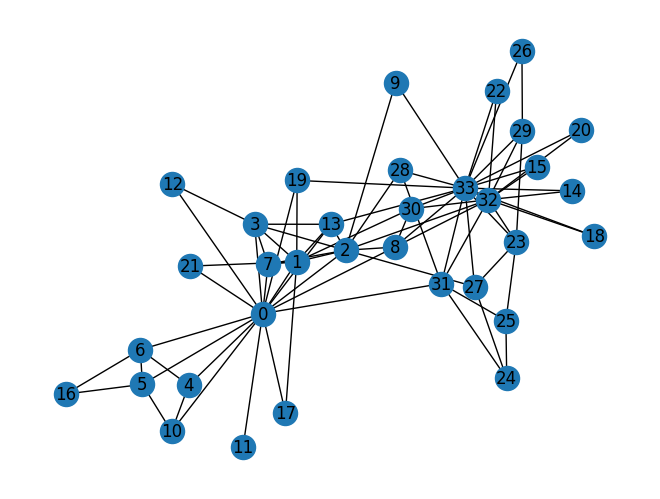

In [1]:
from __future__ import print_function, division
%matplotlib inline

import networkx as nx
import numpy as np

G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
len(G.nodes)

### 3.1. Diffusion process
Now we implement the diffusion process. Each active node will cause other nodes in the graph to become active over time. The diffusion rule is that a node gets active if at least a certain percentage of its neighbors become active. The process continues until convergence (i.e. has no new node activated).

OPTIONAL: Can you implement a data visualization to illustrate the diffusion proceess?

In [3]:
def diffusion(graph, seed_set, thr=0.5):
    active = seed_set
    has_changed = False

    # Loop through not active nodes and activate a node if more than "thr" percent of its neighbors are active
    for n in graph.nodes:
        if n not in active:  # Only consider nodes that are not already active
            neighbors = list(graph.neighbors(n))
            active_neighbors = set(neighbors).intersection(active)
            if len(active_neighbors) >= thr * len(neighbors):
                active.add(n)
                has_changed = True
    if has_changed:
        return diffusion(graph, active, thr)
    return active

result = diffusion(G, {0,1})
print(result)


{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21}


### 3.2. Influence Maximization

Now we find a minimal set of seeds that maximize the influence (i.e. the number of active nodes). The influence maximization problem is NP-hard in general. Here, we use greedy algorithm which iteratively chooses a seed such that the gain of influence is maximal.

In [16]:
def utility(graph, seeds, thr=0.5):
    return len(diffusion(graph, seeds.copy(), thr))

def greedy(graph, k=3, thr=0.5):
    seeds = set()
    for i in range(k):
        max_gain = 0
        chosen_seed = -1

        # TODO: greedily choose the node as seed with maximal utility gain
        for node in graph.nodes:
            if node not in seeds:
                current_seeds = seeds.copy()
                current_seeds.add(node)
                gain = utility(graph, current_seeds, thr) - utility(graph, seeds, thr)
                if gain > max_gain:
                    max_gain = gain
                    chosen_seed = node
        if max_gain > 0:
            seeds = seeds | {chosen_seed}
        else:
            break
    return seeds

seeds = greedy(G,3)
print("set" + str(list(seeds)))
print(utility(G, seeds))

set[0, 33, 4]
34
